In [43]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import folium
import matplotlib.pyplot as plt
# set the plot size and style for Seaborn
sns.set(rc={'figure.figsize':(16,6)})
sns.set_style("white")

In [5]:
df = pd.read_csv('aqi_data.csv')
df.head(-1)

,date,site,parameter,index_value,description,health_advisory,health_effects
0,2016-01-01,Lawrenceville,PM25B,25,Good,NaN,NaN
1,2016-01-01,Flag Plaza,CO,0,Good,NaN,NaN
2,2016-01-01,Harrison Township,OZONE,31,Good,NaN,NaN
3,2016-01-01,Avalon,SO2,10,Good,NaN,NaN
4,2016-01-01,Lincoln,PM25,35,Good,NaN,NaN
...,...,...,...,...,...,...,...
58748,2023-04-09,North Braddock,PM25_640,29,Good,NaN,NaN
58749,2023-04-09,Parkway East,PM25_640,24,Good,NaN,NaN
58750,2023-04-09,Avalon,PM25_640,33,Good,NaN,NaN
58751,2023-04-09,Clairton,PM25_640,39,Good,NaN,NaN


In [6]:
def drop_txt(df):
    """Removes columns with 'txt' in the title

    Args:
        df (DataFrame): Pandas DataFrame

    Returns:
        DataFrame: DataFrame with 'txt' columns removed
    """    
    comment_columns = []
    for c in df.columns:
        if 'txt' in c:
            comment_columns.append(c)
    df = df.drop(columns=comment_columns)
    return df
df = drop_txt(df)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58754 entries, 0 to 58753
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             58754 non-null  object
 1   site             58754 non-null  object
 2   parameter        58754 non-null  object
 3   index_value      58754 non-null  int64 
 4   description      58754 non-null  object
 5   health_advisory  4546 non-null   object
 6   health_effects   4546 non-null   object
dtypes: int64(1), object(6)
memory usage: 3.1+ MB


In [9]:
locations = pd.read_csv('sensor_loactions.csv')
locations.head()

,site_name,description,air_now_mnemonic,address,latitude,longitude,enabled
0,Harrison Township,Harrison Township Ozone and NO/NOx Site,HT1,Highlands Senior High School - 1500 Pacific Av...,40.613864,-79.729569,t
1,South Fayette,South Fayette Ozone Site,SF1,South Fayette Elementary School - 3640 Old Oak...,40.375647,-80.169931,t
2,Lawrenceville,"Lawrenceville Ozone, and Met Site",LV1,Allegheny County Health Department - 301 39th ...,40.465433,-79.960742,t
3,Liberty,Liberty Borough South Allegheny High School Site,NaN,South Allegheny High School - 2743 Washington ...,40.323856,-79.868064,t
4,West Allegheny,West Allegheny H2S Site,NaN,NaN,40.444747,-80.267303,f


In [10]:
locations = locations[['site_name', 'latitude', 'longitude']]
locations.rename(columns={'site_name':'site'}, inplace=True)
df = pd.merge(df, locations, on='site')
df.head()

,date,site,parameter,index_value,description,health_advisory,health_effects,latitude,longitude
0,2016-01-01,Lawrenceville,PM25B,25,Good,NaN,NaN,40.465433,-79.960742
1,2016-01-01,Lawrenceville,OZONE,31,Good,NaN,NaN,40.465433,-79.960742
2,2016-01-02,Lawrenceville,PM25B,40,Good,NaN,NaN,40.465433,-79.960742
3,2016-01-02,Lawrenceville,OZONE,21,Good,NaN,NaN,40.465433,-79.960742
4,2016-01-03,Lawrenceville,PM25B,35,Good,NaN,NaN,40.465433,-79.960742


In [14]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

In [35]:
particulates = df[['index_value']]

In [36]:
particulates.count().sort_values(ascending=False)

index_value    56814
dtype: int64

In [37]:
df['particulate_sum'] = df[particulates.columns].sum(axis=1)
df['particulate_counts'] = df[particulates.columns].count(axis=1)

In [38]:
df['particulate_sum']

0        25
1        31
2        40
3        21
4        35
         ..
56809     7
56810     0
56811     1
56812     3
56813     0
Name: particulate_sum, Length: 56814, dtype: int64

In [39]:
df['particulate_counts']

0        1
1        1
2        1
3        1
4        1
        ..
56809    1
56810    1
56811    1
56812    1
56813    1
Name: particulate_counts, Length: 56814, dtype: int64

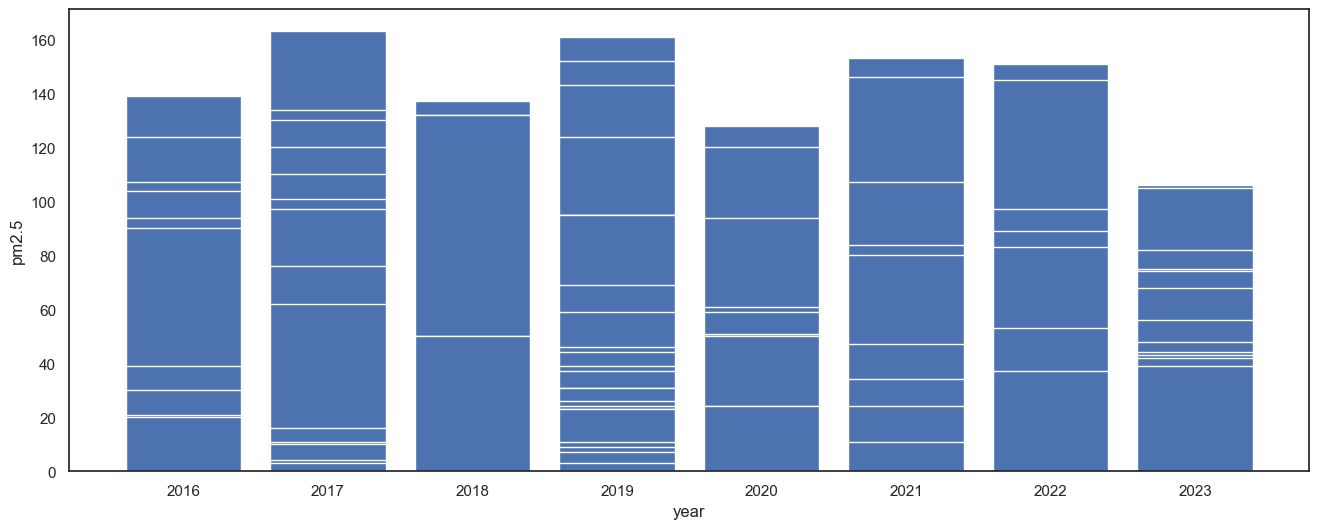

In [59]:
plt.bar(df['year'], df['particulate_sum'])
plt.xlabel('year')
plt.ylabel('pm2.5')
plt.show()

In [61]:
m = folium.Map(location=[40.441585415615734, -80.00550314688637], tiles="Stamen Toner")
for i in range(locations.shape[0]):
    sensor = locations.iloc[i]
    if sensor.latitude > 0:
        folium.Marker([sensor.latitude, sensor.longitude], popup=sensor.site).add_to(m)
m